In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.shape #Data contains 520 rows and 17 columns 

(520, 17)

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
data.isna().sum() #There are no null values 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
Data=data

In [7]:
Data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
Data['Gender'] = Data['Gender'].map({'Male':1,'Female':0})
Data['class'] = Data['class'].map({'Positive':1,'Negative':0})
Data['Polyuria'] = Data['Polyuria'].map({'Yes':1,'No':0})
Data['Polydipsia'] = Data['Polydipsia'].map({'Yes':1,'No':0})
Data['sudden weight loss'] = Data['sudden weight loss'].map({'Yes':1,'No':0})
Data['weakness'] = Data['weakness'].map({'Yes':1,'No':0})
Data['Polyphagia'] = Data['Polyphagia'].map({'Yes':1,'No':0})
Data['Genital thrush'] = Data['Genital thrush'].map({'Yes':1,'No':0})
Data['visual blurring'] = Data['visual blurring'].map({'Yes':1,'No':0})
Data['Itching'] = Data['Itching'].map({'Yes':1,'No':0})
Data['Irritability'] = Data['Irritability'].map({'Yes':1,'No':0})
Data['delayed healing'] = Data['delayed healing'].map({'Yes':1,'No':0})
Data['partial paresis'] = Data['partial paresis'].map({'Yes':1,'No':0})
Data['muscle stiffness'] = Data['muscle stiffness'].map({'Yes':1,'No':0})
Data['Alopecia'] = Data['Alopecia'].map({'Yes':1,'No':0})
Data['Obesity'] = Data['Obesity'].map({'Yes':1,'No':0})

In [9]:
Data.head() #all values have been coverted to numerical values 

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Explolatory Data Analysis

**Correlation Plot**

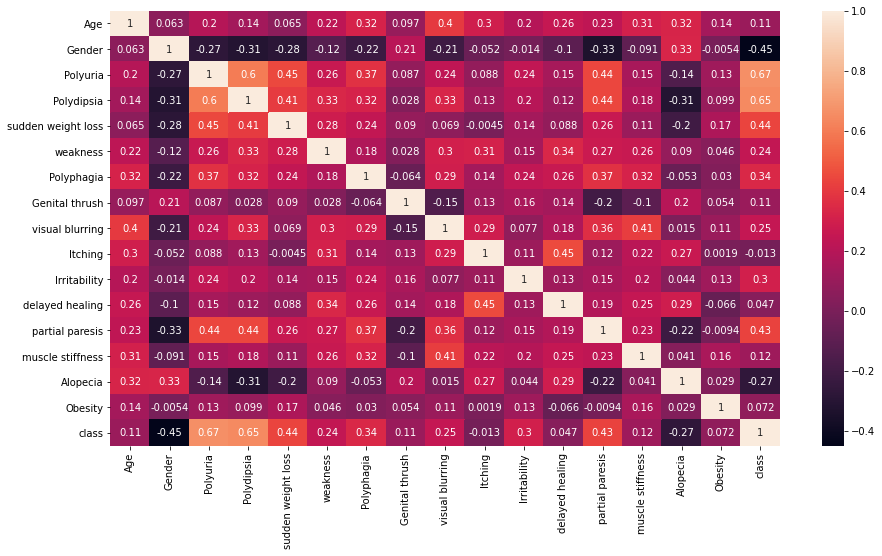

In [10]:
corrdata = Data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

**Age vs Class**

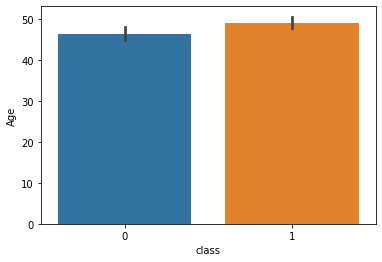

In [11]:
sns.barplot(x='class',y='Age',data=Data) 

In [12]:
Data['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

**Gender vs Class**

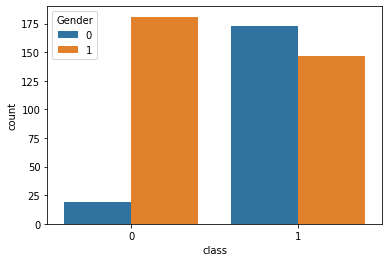

In [13]:
sns.countplot(x='class',data=Data,hue='Gender') 

# Model Building 


Splitting into training and testing data 

In [14]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(Data.iloc[:,:-1],Data.iloc[:,-1],train_size=0.8,random_state=1)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
pred=model.predict(testX)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
print(accuracy_score(pred,testY)) #0.9807692307692307
print(".....................")
print(classification_report(pred,testY))

0.9807692307692307
.....................
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.99        68

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



## Support Vector Classifier

In [19]:
from sklearn.svm import SVC
model=SVC(gamma=0.8,degree=0.8,max_iter=10000)
model.fit(trainX,trainY)
pred=model.predict(testX)

In [20]:
print(accuracy_score(pred,testY)) #0.9038461538461539
print(".....................")
print(classification_report(pred,testY))

0.9038461538461539
.....................
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.87      0.93        76

    accuracy                           0.90       104
   macro avg       0.87      0.93      0.89       104
weighted avg       0.93      0.90      0.91       104



# Artificial Neural Network

In [ ]:
pip install tensorflow==2.2

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import normalize

In [23]:
#Normalizing the data
from keras.utils import normalize
Xtrain=normalize(trainX)
Xtest=normalize(testX)

In [ ]:
# Defining the model
model=keras.models.Sequential()
model.add(keras.layers.Flatten()) #Flattens the input
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) #Adding input layer with 128 neurons and relu activation func
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
# Adam Optimiser converges faster than any other existing optimizer
# sparse categorical crossentropy combines the good of crossentropy and one hot encoding
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(Xtrain,trainY,epochs=1000,callbacks=False)

In [25]:
loss, accuracy=model.evaluate(Xtest,testY)

4/4 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9712


In [27]:
print(loss)
print("..............")
print(accuracy) #0.9711538553237915

0.13074687123298645
..............
0.9711538553237915
